In [ ]:
## 백준 A형 기출 문제


# 17825 . 주사위 윷놀이


# 전형적인 탐색문제 - > Action : 네 말중 하나를 움직이는것

# 1. 게임판 구현

# 2 탐색 -> 가장 높은 해를 찾는 문제
# 탐색공간 자체는 10개턴 이므로 충분함 , 점수를 표기한후 맥스값확인


Input_dice = [1 for __ in range(10)]


# Num_Pos (블록 넘버링 정보)

# 0 : 스타팅
# 1번 ~ 20번 블락 ( 2 ~ 40 )
# 21 , 22 , 23 (13,16,19)
# 24 , 25  (22, 24)
# 26,  27 , 28 (28,27,26)
# 29 , 30 , 31 (25 30 35)


# 블록-포인트
point_index = [0 , 2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40  , 13,16,19  , 22,24  ,  28,27,26  , 25, 30, 35]
                

    
## 1. 게임 환경 구현.. 
    
# 이동경로 정보
main_road = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
side_road_10 = [21,22,23, 29,30,31,20]
side_road_20 = [24,25  ,29,30,31,20]
side_road_30 = [26,27,28, 29,30,31,20]
side_road_25 = [29,30,31,19]

Now_pos = 0
Point = 0

# for dice in Input_dice:
    
#     # 크게 회전하는 경우
#     if Now_pos < 20:
        
#         # 10번 블록
#         if Now_pos == 5:
#             Now_pos = side_road_10[ dice - 1 ]
            
#         # 20번 블록
#         elif Now_pos == 10:
#             Now_pos = side_road_20[ dice - 1 ]
         
#         # 30번 블록
#         elif Now_pos == 15:
#             Now_pos = side_road_30[ dice - 1 ]
        
#         # 위 3가지가 아니라면 회전 이동
#         else:
#             Now_pos = Now_pos + dice
#             if Now_pos + dice > 20:
#                 print("탈출..!")
#                 break
    
#     elif Now_pos == 21 or Now_pos == 22 or Now_pos == 23:
#         if Now_pos - 21 + dice > len(side_road_10):
#             print("도착!")
#             break
#         else:
#             Now_pos = side_road_10[ Now_pos - 21 + dice ]
        
#     elif Now_pos == 24 or Now_pos == 25:
#         if Now_pos - 24 + dice > len(side_road_20):
#             print("도착!")
#             break
#         else:
#             Now_pos = side_road_20[ Now_pos - 24 + dice ]  
        
#     elif Now_pos == 26 or Now_pos == 27 or Now_pos == 28:
#         if Now_pos - 26 + dice > len(side_road_30):
#             print("도착!")
#             break
#         else:
#             Now_pos = side_road_30[ Now_pos - 26 + dice ]       
        
#     elif Now_pos == 29 or Now_pos == 30 or Now_pos == 31:
#         if Now_pos - 29 + dice > len(side_road_25):
#             print("도착!")
#             break
#         else:
#             Now_pos = side_road_25[ Now_pos- 29 + dice ]   
        
#     elif Now_pos == 20:
#         print("도착!!")
        
#     Point = Point + point_index[Now_pos]
        
#     print("Dice :  " , dice ,  "  Now_pos : " , Now_pos , "  Now_Point : ", point_index[Now_pos] , "  Total_Point : ", Point)
        
    

    
## 2. 탐색 구현.. 

# 현재 찾은 최댓값
MAX = -1

# 현재 말의 위치들
POSITIONS = [0,0,0,0]



# 탐색 함수
def searchDFS( idx , turn ,Positions , Point):
    
    global MAX
    
    POSITIONS = Positions.copy()
    
    # 탐색종료 시점 : Turn = 10
    if turn == 10 :
        if Point > MAX:
            MAX = Point
            
        print("Turn : {} ,  Point : {}".format(turn , Point))
        return
    
    # 다이스 , 현재 말 위치정보 , 움직일 말 정보
    dice = Input_dice[turn]
    Now_pos = POSITIONS[idx]
    Now_pos1 = Now_pos
    
    if POSITIONS[idx] == -1:
        return
    
    # 크게 회전하는 경우
    if Now_pos < 20:
        
        # 10번 블록
        if Now_pos == 5:
            Now_pos = side_road_10[ dice - 1 ]
            
        # 20번 블록
        elif Now_pos == 10:
            Now_pos = side_road_20[ dice - 1 ]
         
        # 30번 블록
        elif Now_pos == 15:
            Now_pos = side_road_30[ dice - 1 ]
        
        # 위 3가지가 아니라면 회전 이동
        else:
            Now_pos = Now_pos + dice
            if Now_pos + dice > 20:
                #print("탈출..!")
                POSITIONS[idx] = -1
    
    elif Now_pos == 21 or Now_pos == 22 or Now_pos == 23:
        if Now_pos - 21 + dice > len(side_road_10):
            #print("도착!")
            POSITIONS[idx] = -1
        else:
            Now_pos = side_road_10[ Now_pos - 21 + dice ]

    elif Now_pos == 24 or Now_pos == 25:
        if Now_pos - 24 + dice > len(side_road_20):
            #print("도착!")
            POSITIONS[idx] = -1
        else:
            Now_pos = side_road_20[ Now_pos - 24 + dice ]  

    elif Now_pos == 26 or Now_pos == 27 or Now_pos == 28:
        if Now_pos - 26 + dice > len(side_road_30):
            #print("도착!")
            POSITIONS[idx] = -1
           
        else:
            Now_pos = side_road_30[ Now_pos - 26 + dice ]       

    elif Now_pos == 29 or Now_pos == 30 or Now_pos == 31:
        if Now_pos - 29 + dice > len(side_road_25):
            #print("도착!")
            POSITIONS[idx] = -1
          
        else:
            Now_pos = side_road_25[ Now_pos- 29 + dice ]   

    elif Now_pos == 20:
        #print("도착!!")
        POSITIONS[idx] = -1

    Point = Point + point_index[Now_pos]
    POSITIONS[idx] = Now_pos
    
    #print("Turn : {} ,  Idx :  {}  , Dice :  {} ,  Position : {}  , Del_Point : {}".format(turn ,  idx , dice ,  POSITIONS[idx] , point_index[Now_pos]))
    #print("BEFORE {}  -> NOW  {} ".format(Now_pos1,Now_pos))
    if turn < 10:
        for i in range(4):
            searchDFS( i , turn + 1, POSITIONS , Point)
            

        
searchDFS(0,0, [0,0,0,0] , 0)
print(MAX)

        
        



In [ ]:
##dsd

## 17837 번 . 새로운 게임 2

# 1 . 각 말판 정보 : 위치 (x,y) , 방향 (0~3)
# 2 . 게임 판 위치 정보 : N*M 크기 , 위에 있는 말들 정보 (순서 고려)
# 3 . 게임 진행 : 말 순서대로 진행 하되 , 위치에 따라 다른 행동 


# N = 4
# K = 4

# # 앞에 2개는 행 과 열 , 뒤는 방향 (오른쪽 , 왼 , 위 , 아래 순)
# piece_0 = [2,1,1]
# piece_1 = [3,2,3]
# piece_2 = [2,2,1]
# piece_3 = [4,1,2]

# # 전체 말 정보 
# PIECES = [ piece_0 , piece_1 , piece_2 , piece_3 ]

# # 0 이면 흰색 , 1은 빨간색 , 2는 파란색 , 지정 4X + Y
# MAP = [ 0 , 0 , 2 , 0 , \
#            0 , 0 , 1 , 0 ,\
#             0 , 0 , 1 , 2 ,\
#                 0 , 2 , 0 , 0 ]


import sys

N, K = map(int, sys.stdin.readline().split())

MAP = []

for __ in range(N):
    MAP = MAP + list(map(int,sys.stdin.readline().split()))

PIECES = [list( map(int,sys.stdin.readline().split() )) for _ in range(K)]


# N = 6
# K = 10

# import sys

# # 앞에 2개는 행 과 열 , 뒤는 방향 (오른쪽 , 왼 , 위 , 아래 순)
# piece_0 = [1,1,1]
# piece_1 = [2,2,2]
# piece_2 = [3,3,4]
# piece_3 = [4,4,1]
# piece_4 = [5,5,3]
# piece_5 = [6,6,2]
# piece_6 = [1,6,3]
# piece_7 = [6,1,2]
# piece_8 = [2,4,3]
# piece_9 = [4,2,1]

# # 전체 말 정보 
# PIECES = [ piece_0 , piece_1 , piece_2 , piece_3 , piece_4 ,\
#              piece_5 , piece_6 , piece_7 , piece_8 , piece_9 ]

# # 0 이면 흰색 , 1은 빨간색 , 2는 파란색 , 지정 4X + Y
# MAP = [ 0 , 1 , 2 , 0, 1, 1 , \
#            1 , 2 , 0 , 1 , 1 , 0 ,  \
#             2, 1, 0, 1 , 1 , 0 ,\
#                 1, 0 ,1, 1, 0 , 2 ,\
#                   2, 0, 1, 2 , 0 , 1 ,\
#                       0, 2, 1, 0 , 2 , 1 ]

# 행동
action = [1 , -1 , -N , N]

action_dx = [1,-1, 0,0]
action_dy = [0,0,-1,1]



# 게임판 위치 정보 : ( [3,0,1] 가 들어가있으면  3-0-1 순으로 스택 )
AREA = [ [] for __ in range(N*N)]

for idx in range(K):
    
    x = PIECES[idx][1] - 1 
    y = PIECES[idx][0] - 1
    
    AREA[ x + y * N ].append(idx) 

# 초기화


# 최대 1000 턴 게임 진행
for turn in range(1000):
    
    for idx in range(K):
        
        
        
        # 현재 말의 정보
        x = PIECES[idx][1] - 1 
        y = PIECES[idx][0] - 1
        direction = PIECES[idx][2] - 1
        area = x + y * N
        
        #print(" Turn : {} , {} 번 말 ,  원위치 : {} , {}   ,  방향  : {} ".format(turn+1 , idx + 1 , x + 1, y + 1 , direction + 1))
    
        
        
        # 말이 이동할 좌표를 계산
        next_x = x + action_dx[direction]
        next_y = y + action_dy[direction]
        next_direction = direction
        next_area = area + action[next_direction]
        
        # 같이 이동할 말을 고려 , 말이 그 칸에서 몇번쨰 있는지 탐색
        num_area = AREA[area].index(idx) 
        
        # 1. 벽과 마주치는 경우 / 가려는 위치가 파란색인 경우
        if next_x < 0  or  next_x > N - 1  or \
               next_y < 0  or  next_y > N - 1 or MAP[next_area] == 2 :
            
            #print("벽만남!")
            
            # 방향 변환
            if direction == 0:
                next_direction = 1
            elif direction == 1:
                next_direction = 0
            elif direction == 2:
                next_direction = 3
            elif direction == 3:
                next_direction = 2
        
            # 수정된 방향에 맞춰 이동할 좌표 다시 계산
            next_x = x + action_dx[next_direction]
            next_y = y + action_dy[next_direction]
            next_area = area + action[next_direction]
        
            # 벽 충돌 or 파란색 인지 다시 검사
            if next_x < 0  or  next_x > N - 1  or \
                   next_y < 0  or  next_y > N - 1:
                #print("이동 불가")
                continue
                
                
            elif MAP[next_area] == 2:
                #print("ㅇㄴㄹㄴㅇㄹㄴㅇㄹ")
                #print("이동 불가")
                continue
                
            # 이동 가능시 이동
            else:
                
                # 이걸 안해줫네.... 좌표도 같이바꿔줘야되는데
                
                move_idx = AREA[area][num_area:]
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
                
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1] 
                
#                 #print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
#                       .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                if len(AREA[next_area]) > 3:
                    print(turn + 1)
                    #print("게임 성공..! , 턴 수 : {} ".format(turn + 1))
                    break
               # print("이동 좌표 : {} , {} , {} ".format(next_x + 1 , next_y + 1 , next_direction + 1))
        
        
        # 2. 벽을 마주치지 않는 경우 -> 정상 진행
        else:
            next_area = area + action[direction]
            
            #print("next area ", MAP[next_area])
            # 흰색 영역
            if MAP[next_area] == 0:
                
                move_idx = AREA[area][num_area:]
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
                
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1] 
#                 #print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
#                       .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                if len(AREA[next_area]) > 3:
                    print(turn + 1)
                    break
                
            # 빨간색 영역
            elif MAP[next_area]  == 1:
                
                move_idx = AREA[area][num_area:].copy()
                move_idx.reverse()
#                 print("move_Idx" ,move_idx)
#                 print("AREA_area" , AREA[area])
#                 print("NEXT_AREA_area" , AREA[next_area])
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
         
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1]
#                 #print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
#                       .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                
                if len(AREA[next_area]) > 3:
                    #print("AREA : " , AREA)
                    #print("게임 성공..! , 턴 수 : {} ".format(turn + 1))
                    print(turn + 1)
                    sys.exit()
        
        
        #print("")
        #print("AREA : " , AREA)
        #print("")
             
    
        
    

print(-1)


In [1]:
##dsd

## 17837 번 . 새로운 게임 2

# 1 . 각 말판 정보 : 위치 (x,y) , 방향 (0~3)
# 2 . 게임 판 위치 정보 : N*M 크기 , 위에 있는 말들 정보 (순서 고려)
# 3 . 게임 진행 : 말 순서대로 진행 하되 , 위치에 따라 다른 행동 


# N = 4
# K = 4

# # 앞에 2개는 행 과 열 , 뒤는 방향 (오른쪽 , 왼 , 위 , 아래 순)
# piece_0 = [2,1,1]
# piece_1 = [3,2,3]
# piece_2 = [2,2,1]
# piece_3 = [4,1,2]

# # 전체 말 정보 
# PIECES = [ piece_0 , piece_1 , piece_2 , piece_3 ]

# # 0 이면 흰색 , 1은 빨간색 , 2는 파란색 , 지정 4X + Y
# MAP = [ 0 , 0 , 2 , 0 , \
#            0 , 0 , 1 , 0 ,\
#             0 , 0 , 1 , 2 ,\
#                 0 , 2 , 0 , 0 ]

N = 4
K = 4

# 앞에 2개는 행 과 열 , 뒤는 방향 (오른쪽 , 왼 , 위 , 아래 순)
piece_0 = [1,1,1]
piece_1 = [1,2,1]
piece_2 = [1,3,1]
piece_3 = [3,3,3]


# 전체 말 정보 
PIECES = [ piece_0 , piece_1 , piece_2 , piece_3 ]

# 0 이면 흰색 , 1은 빨간색 , 2는 파란색 , 지정 4X + Y
MAP = [ 0 , 0 ,0 ,0   , 0,0,0,0 ,0,0,0,0 ,0,0,0,0]

# 행동
action = [1 , -1 , -N , N]

action_dx = [1,-1, 0,0]
action_dy = [0,0,-1,1]




# 게임판 위치 정보 : ( [3,0,1] 가 들어가있으면  3-0-1 순으로 스택 )
AREA = [ [] for __ in range(N*N)]

for idx in range(K):
    
    x = PIECES[idx][1] - 1 
    y = PIECES[idx][0] - 1
    
    AREA[ x + y * N ].append(idx) 

# 초기화


# 최대 1000 턴 게임 진행
for turn in range(10):
    
    for idx in range(K):
        
        
        
        # 현재 말의 정보
        x = PIECES[idx][1] - 1 
        y = PIECES[idx][0] - 1
        direction = PIECES[idx][2] - 1
        area = x + y * N
        
        print(" Turn : {} , {} 번 말 ,  원위치 : {} , {}   ,  방향  : {} ".format(turn+1 , idx + 1 , x + 1, y + 1 , direction + 1))
    
        
        
        # 말이 이동할 좌표를 계산
        next_x = x + action_dx[direction]
        next_y = y + action_dy[direction]
        next_direction = direction
        next_area = area + action[next_direction]
        
        # 같이 이동할 말을 고려 , 말이 그 칸에서 몇번쨰 있는지 탐색
        num_area = AREA[area].index(idx) 
        
        # 1. 벽과 마주치는 경우 / 가려는 위치가 파란색인 경우
        if next_x < 0  or  next_x > N - 1  or \
               next_y < 0  or  next_y > N - 1 or MAP[next_area] == 2 :
            
            #print("벽만남!")
            
            # 방향 변환
            if direction == 0:
                next_direction = 1
            elif direction == 1:
                next_direction = 0
            elif direction == 2:
                next_direction = 3
            elif direction == 3:
                next_direction = 2
        
            # 수정된 방향에 맞춰 이동할 좌표 다시 계산
            next_x = x + action_dx[next_direction]
            next_y = y + action_dy[next_direction]
            next_area = area + action[next_direction]
        
            # 벽 충돌 or 파란색 인지 다시 검사
            if next_x < 0  or  next_x > N - 1  or \
                   next_y < 0  or  next_y > N - 1:
                #print("이동 불가")
                continue
                
                
            elif MAP[next_area] == 2:
                #print("ㅇㄴㄹㄴㅇㄹㄴㅇㄹ")
                #print("이동 불가")
                continue
                
            # 이동 가능시 이동
            else:
                
                # 이걸 안해줫네.... 좌표도 같이바꿔줘야되는데
                
                move_idx = AREA[area][num_area:]
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
                
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1] 
                
                print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
                      .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                if len(AREA[next_area]) > 3:
                    print("AREA : " , AREA)
                    print("게임 성공..! , 턴 수 : {} ".format(turn + 1))
                    sys.exit()
        
               # print("이동 좌표 : {} , {} , {} ".format(next_x + 1 , next_y + 1 , next_direction + 1))
        
        
        # 2. 벽을 마주치지 않는 경우 -> 정상 진행
        else:
            next_area = area + action[direction]
            
            #print("next area ", MAP[next_area])
            # 흰색 영역
            if MAP[next_area] == 0:
                
                move_idx = AREA[area][num_area:]
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
                
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1] 
                print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
                      .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                if len(AREA[next_area]) > 3:
                    print("AREA : " , AREA)
                    print("게임 성공..! , 턴 수 : {} ".format(turn + 1))
                    sys.exit()
        
            # 빨간색 영역
            elif MAP[next_area]  == 1:
                
                move_idx = AREA[area][num_area:].copy()
                move_idx.reverse()
#                 print("move_Idx" ,move_idx)
#                 print("AREA_area" , AREA[area])
#                 print("NEXT_AREA_area" , AREA[next_area])
                
                AREA[next_area] = AREA[next_area] + move_idx
                AREA[area] = AREA[area][:num_area]
         
                for i in move_idx :
                    PIECES[i][0] = next_y + 1
                    PIECES[i][1] = next_x + 1
                   
                PIECES[idx] = [next_y + 1 , next_x + 1 , next_direction + 1]
                print(" Turn : {} , {} 번 말  Area : {} , 이동위치 : {} , {}   ,  방향  : {} "\
                      .format(turn+1 , idx + 1 ,  MAP[next_area] ,  next_x + 1, next_y + 1 , next_direction + 1))
                
                if len(AREA[next_area]) > 3:
                    print("AREA : " , AREA)
                    print("")
                    print("게임 성공..! , 턴 수 : {} ".format(turn + 1))
                    sys.exit()
        
        
        print("")
        print("AREA : " , AREA)
        print("")
             
    
        
    

print("턴오버 게임 실패.... ")


 Turn : 1 , 1 번 말 ,  원위치 : 1 , 1   ,  방향  : 1 
 Turn : 1 , 1 번 말  Area : 0 , 이동위치 : 2 , 1   ,  방향  : 1 

AREA :  [[], [1, 0], [2], [], [], [], [], [], [], [], [3], [], [], [], [], []]

 Turn : 1 , 2 번 말 ,  원위치 : 2 , 1   ,  방향  : 1 
 Turn : 1 , 2 번 말  Area : 0 , 이동위치 : 3 , 1   ,  방향  : 1 

AREA :  [[], [], [2, 1, 0], [], [], [], [], [], [], [], [3], [], [], [], [], []]

 Turn : 1 , 3 번 말 ,  원위치 : 3 , 1   ,  방향  : 1 
 Turn : 1 , 3 번 말  Area : 0 , 이동위치 : 4 , 1   ,  방향  : 1 

AREA :  [[], [], [], [2, 1, 0], [], [], [], [], [], [], [3], [], [], [], [], []]

 Turn : 1 , 4 번 말 ,  원위치 : 3 , 3   ,  방향  : 3 
 Turn : 1 , 4 번 말  Area : 0 , 이동위치 : 3 , 2   ,  방향  : 3 

AREA :  [[], [], [], [2, 1, 0], [], [], [3], [], [], [], [], [], [], [], [], []]

 Turn : 2 , 1 번 말 ,  원위치 : 4 , 1   ,  방향  : 1 
 Turn : 2 , 1 번 말  Area : 0 , 이동위치 : 3 , 1   ,  방향  : 2 

AREA :  [[], [], [0], [2, 1], [], [], [3], [], [], [], [], [], [], [], [], []]

 Turn : 2 , 2 번 말 ,  원위치 : 4 , 1   ,  방향  : 1 
 Turn : 2 , 2 번 말  Are

NameError: name 'sys' is not defined

In [ ]:

## 17779번 . 게더멘더링 2

# import sys
# from matplotlib import pyplot as plt

# # 입력 처리
# N = int(input())
# Arr = [ list( map(int , input().split()) )  for _ in range(N) ]
N = 6
Arr = [[1, 2, 3, 4, 1, 6], \
[7, 8, 9, 1, 4, 2], \
[2, 3, 4, 1 ,1, 3],\
[6, 6, 6, 6, 9, 4],\
[9, 1, 9, 1, 9, 5],\
[1, 1, 1, 1, 9, 9]]

# N = 8
# Arr = [[1, 2 ,3 ,4 ,5 ,6 ,7 ,8], \
# [2 ,3, 4, 5, 6, 7, 8, 9], \
# [3 ,4 ,5 ,6 ,7 ,8 ,9 ,1],\
# [4 ,5 ,6 ,7 ,8 ,9 ,1 ,2],\
# [5 ,6 ,7 ,8 ,9 ,1 ,2 ,3],\
# [6 ,7 ,8 ,9 ,1 ,2, 3, 4] , [7 ,8 ,9 ,1 ,2 ,3 ,4 ,5] , [8, 9, 1, 2, 3, 4, 5, 6]]

# Arr = [ [5 for __ in range(6)] for __ in range(6)]

# 필요한 데이터 변수 생성
MIN = 100000  # 최솟값


# 테스트용
Total = 0
for i in range(len(Arr)):
    for j in range(len(Arr[0])):
        Total = Arr[i][j] + Total
        
#print("전체 인구 : ", Total)

# 각 선거구 인구 합
Population = [0 for __ in range(5)]
mark_5 = []
Marking_Arr = [ [0 for __ in range(N)] for __ in range(N)]

# x,y,d_1 , d_2 는 0 ~ N-1

# X/Y 는 기준좌표 0 ~ N-1 값
for X in range(N):
    for Y in range(N):
        # d_1 , d_2 는 거리간격 1 ~ N-1 값
        for d_1 in range(1,N):
            for d_2 in range(1,N):
            
                # 조건 안맞으면 쫑내기
                if Y + d_1 + d_2 > N - 1:
                    continue
                elif X - d_1 >= 0 and X + d_2 <= N-1:
                    
                    #print("X , Y = {} , {}   d_1 , d_2  =  {} , {}".format(X,Y,d_1,d_2))
                    # 5 번 선거구 먼저 계산
                    
                    mark_5 = []
                    Marking_Arr = [ [0 for __ in range(N)] for __ in range(N)]
                    Population = [0 for __ in range(5)]
                    
                    if d_1 >= d_2:
                    
                        for i in range( 0 , d_2 + 1):
                            for j in range( -i , i + 1 ):
                                mark_5.append([X + i , Y + j])

                        for i in range( d_2 + 1 , d_1 + 1 ):
                            for j in range( -d_2 , d_2 + 1 ):
                                mark_5.append([X + i , Y + j - i + d_2])

                        for i in range( d_1 + 1 , d_1 + d_2 + 1 ):
                            for j in range( -d_2 + 1 + i - (d_1 + 1) , d_2 - 1 - (i -  (d_1 + 1)) + 1):
                                mark_5.append([X + i , Y - d_1 + d_2 + j])

                    else:
                        
                        for i in range( 0 , d_1 + 1):
                            for j in range( -i , i + 1 ):
                                mark_5.append([X + i , Y + j])

                        for i in range( d_1 + 1 , d_2 + 1 ):
                            for j in range( -d_1 , d_1 + 1 ):
                                mark_5.append([X + i , Y + j - i + d_1])

                        for i in range( d_2 + 1 , d_2 + d_1 + 1 ):
                            for j in range( -d_1 + 1 + i - (d_2 + 1) , d_1 - 1 - (i -  (d_2 + 1)) + 1):
                                mark_5.append([X + i , Y + d_2 - d_1 + j])
   
                    #print(mark_5)
                    for idx in range(len(mark_5)):
                        #print(mark_5[idx])
                        num = Arr[mark_5[idx][0]][mark_5[idx][1]]
                        Marking_Arr[mark_5[idx][0]][mark_5[idx][1]] = -1                    
                        Population[4] = Population[4] + num
                            
                            # 5번 선거구 먼저 계산한다
                            
                    for x in range(N):
                        for y in range(N):
                            if Marking_Arr[x][y] == -1:
                                continue
                                

                            # 1번 선거구
                            elif x >= 0 and x <= X+d_1 and y >= 0 and y <Y:
                                Population[0] = Population[0] + Arr[x][y]

                            # 3번 선거구
                            elif x >= 0 and x < X+d_2 and y >= Y and y <= N-1:
                                Population[2] = Population[2] + Arr[x][y]    

                            # 2번 선거구
                            elif x > X + d_1  and x <= N - 1 and y >= 0 and y <= Y - d_1 + d_2 :
                                Population[1] = Population[1] + Arr[x][y]

                            # 4번 선거구
                            elif x >= X + d_2  and x <= N - 1 and y > Y - d_1 + d_2  and y <= N-1:
                                Population[3] = Population[3] + Arr[x][y]
                                
#                             else:
#                                 print("너넨 뭐냐...? : " , x , y)
                    
                    # 인구가 0 인 지역구가 존재한다면 뺴기
                    flag = 0
                    for pop in Population:
                        if pop == 0:
                            flag = 1
                    if flag == 1:
                        continue
                            
                            
                    diff = max(Population) - min(Population)
                    print("X , Y = {} , {}   d_1 , d_2  =  {} , {}".format(X,Y,d_1,d_2))
                    print(Population , sum(Population) , diff)
                    #print("")
                    if diff < MIN:
                        MIN = diff

#print("")
print(MIN)z
                            

                        

    



[[1, 2, 3, 4, 1, 6], [7, 8, 9, 1, 4, 2], [2, 3, 4, 1, 1, 3], [6, 6, 6, 6, 9, 4], [9, 1, 9, 1, 9, 5], [1, 1, 1, 1, 9, 9]]
왜
??
??
??
??
??
??
??
??
??
??
??
??
??
??
18


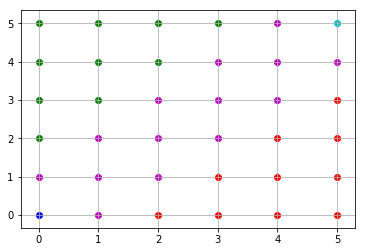

In [53]:
import sys
import matplotlib.pyplot as plt
# 주의사항
#(R,C) = (x,y) , 자연수임


# 입력
# N = int(input())
# Arr = [ list(map(int , input().split() )) for __ in range(N)]

N = 6

Arr = [[1,2,3,4,1,6] , [7,8,9,1,4,2] , [2,3,4,1,1,3] , [6,6,6,6,9,4] ,[9,1,9,1,9,5], [1,1,1,1,9,9]]

#print(Arr)

# 데이터 변수들
MIN = 100000 
Population = [ 0 for __ in range(5)]

# 5번 선거구 체크 함수
def check_5th(x,y,X,Y,d_1,d_2):
    
    if d_1 >= d_2:
        if x >= X and x <= X + d_2:
            if x - X + Y >= y and  y >= - x + X + Y:
                return 1
            else:
                return 0

        elif x >= X + d_2 and x <= X + d_1:
            if y >= - x + X + Y and  y <= -x + X + 2* d_2 + Y:
                return 1
            else:
                return 0

        elif x >= X + d_1:
            if y >= x- X -2*d_1 + Y and y <= -x + X + 2*d_2 + Y :
                return 1
            else:
                return 0
            
    else:
        if x >= X and x <= X + d_1:
            if x - X + Y >= y and  y >= - x + X + Y:
                return 1
            else:
                return 0

        elif x > X + d_1 and x <= X + d_2:
            if y >= x - X + Y - 2*d_1 and  y <= x - X + Y:
                return 1
            else:
                return 0

        elif x >= X + d_2:
            if y >= x- X -2*d_1 + Y and y <= -x + X + 2*d_2 + Y :
                return 1
            else:
                return 0


flag = 37

test_x = []
test_y = []
test_point_X = [ [] for __ in range(5) ]
test_point_Y = [ [] for __ in range(5) ]

# 메인
for X in range(N): 
    for Y in range(N): 
        for d_1 in range(1,N): 
            for d_2 in range(1,N):
                
             
                
                
                # 케이스마다 초기화
                end_flag = 0
                Population = [ 0 for __ in range(5)]

                # 경계선 제한조건
                if X < 0 or X + d_1 + d_2 > N-1 or d_1 > Y or Y + d_2 > N-1:
                    continue
                
                
                flag = flag + 1
                # 각 Case 에 대해 선거구 분류
                for x in range(N):
                    for y in range(N):

                        
                        # 5번 선거구 판단
                        if check_5th(x,y,X,Y,d_1,d_2) == 1:
                            Population[4] = Population[4] + Arr[x][y]
                            if flag == 41:
                                print("??")
                                test_point_X[4].append(x)
                                test_point_Y[4].append(y)
                            continue

                        # 1 ~ 4번 선거구 판단
                        if x >= 0  and x < X + d_1 and y >= 0 and y <= Y and - x + X + Y >= y:
                            Population[0] = Population[0] + Arr[x][y]
                            if flag == 41:
                                print('왜')
                                test_point_X[0].append(x)
                                test_point_Y[0].append(y)
                        elif x >= 0 and x <= X + d_2 and Y < y and y <= N-1 and x - X + Y <= y:
                            Population[1] = Population[1] + Arr[x][y]
                            if flag == 41:
                                test_point_X[1].append(x)
                                test_point_Y[1].append(y)
                        elif X + d_1 <= x and x <= N-1 and y >= 0  and y < Y-d_1 + d_2 and x - X + Y - 2*d_1 >= y :
                            Population[2] = Population[2] + Arr[x][y]
                            if flag == 41:
                                test_point_X[2].append(x)
                                test_point_Y[2].append(y)
                        else:
                            Population[3] = Population[3] + Arr[x][y]
#                             if flag == 41:
#                                 test_point_X[3].append(x)
#                                 test_point_Y[3].append(y)
                                
#                                 test_x = [X, X+ d_1 , X + d_2 , X + d_1 + d_2]
#                                 test_y = [Y , Y-d_1 , Y + d_2 , Y + d_2 - d_1]


                # 선거구 중 인구가 0 이 존재하면 무효
                for i in range(5):
                    if Population[i] == 0:
                        end_flag = 1
                if end_flag == 1:
                    continue

                # 선거구 차이 최소 
                diff = max(Population) - min(Population)
                if diff < MIN:
                    MIN = diff
print(MIN)


## 디버깅용 그림그리기

# plt.grid(True)
# plt.scatter(test_point_X[0] , test_point_Y[0] , c = 'b')
# plt.scatter(test_point_X[1] , test_point_Y[1] , c = 'g')
# plt.scatter(test_point_X[2] , test_point_Y[2] , c = 'r')
# plt.scatter(test_point_X[3] , test_point_Y[3] , c = 'c')
# plt.scatter(test_point_X[4] , test_point_Y[4] , c = 'm')
#plt.scatter(test_x , test_y , c = 'y')
#plt.show()

In [56]:
import sys

# 입력
N = int(input())
Arr = [ list(map(int , input().split() )) for __ in range(N)]

# 데이터 변수들
MIN = 100000 
Population = [ 0 for __ in range(5)]

# 5번 선거구 체크 함수
def check_5th(x,y,X,Y,d_1,d_2):
    
    if d_1 >= d_2:
        if x >= X and x <= X + d_2:
            if x - X + Y >= y and  y >= - x + X + Y:
                return 1
            else:
                return 0
        elif x >= X + d_2 and x <= X + d_1:
            if y >= - x + X + Y and  y <= -x + X + 2* d_2 + Y:
                return 1
            else:
                return 0
        elif x >= X + d_1:
            if y >= x- X -2*d_1 + Y and y <= -x + X + 2*d_2 + Y :
                return 1
            else:
                return 0         
    else:
        if x >= X and x <= X + d_1:
            if x - X + Y >= y and  y >= - x + X + Y:
                return 1
            else:
                return 0
        elif x > X + d_1 and x <= X + d_2:
            if y >= x - X + Y - 2*d_1 and  y <= x - X + Y:
                return 1
            else:
                return 0
        elif x >= X + d_2:
            if y >= x- X -2*d_1 + Y and y <= -x + X + 2*d_2 + Y :
                return 1
            else:
                return 0

# 메인
for X in range(N): 
    for Y in range(N): 
        for d_1 in range(1,N): 
            for d_2 in range(1,N):
              
                # 케이스마다 초기화
                Population = [ 0 ,0,0,0,0]

                # 경계선 제한조건
                if X < 0 or X + d_1 + d_2 > N-1 or d_1 > Y or Y + d_2 > N-1:
                    continue
                        
                # 각 Case 에 대해 선거구 분류
                for x in range(N):
                    for y in range(N):
         
                        # 5번 선거구 판단
                        if check_5th(x,y,X,Y,d_1,d_2) == 1:
                            Population[4] = Population[4] + Arr[x][y]
                            continue

                        # 1 ~ 4번 선거구 판단
                        if x >= 0  and x < X + d_1 and y >= 0 and y <= Y and - x + X + Y >= y:
                            Population[0] = Population[0] + Arr[x][y]
                        elif x >= 0 and x <= X + d_2 and Y < y and y <= N-1 and x - X + Y <= y:
                            Population[1] = Population[1] + Arr[x][y]
                        elif X + d_1 <= x and x <= N-1 and y >= 0  and y < Y-d_1 + d_2 and x - X + Y - 2*d_1 >= y :
                            Population[2] = Population[2] + Arr[x][y]
                        else:
                            Population[3] = Population[3] + Arr[x][y]

                # 선거구 중 인구가 0 이 존재하면 무효
                for i in range(5):
                    if Population[i] == 0:
                        end_flag = 1
                if end_flag == 1:
                    continue
                # 선거구 차이 최소 
                diff = max(Population) - min(Population)
                if diff < MIN:
                    MIN = diff
print(MIN)

6
5 5 5 5 5 5
5 5 5 5 5 5
5 5 5 5 5 5
5 5 5 5 5 5
5 5 5 5 5 5
5 5 5 5 5 5
20


### 
import sys


# 주의사항
# (R,C)  = (x,y) , 자연수임

# 입력
N = int(input())
Arr = [ list(map(int , sys.stdin.readline().split() ))  for __ in range(N)]


# 데이터 변수들
MIN = 100000
Populations = [ 0 for __ in range(5)]


# 5번 선거구 체크 함수

def check_5th(x,y,X,Y,d_1,d_2):
    
    if x >= X and x <= X + d_2:
        if x - X + Y >= y and  y >= - x + X + Y:
            return 1
        else:
            return 0
        
    elif x > X + d_2 and x <= X + d_1:
        if y >= - x + X + Y and  y <= -x + X + d_2 + Y + d_1:
            return 1
        else:
            return 0
        
    elif x > x + d_1:
        if y >= x- X -2*d_1 + Y and y <= -x + X + d_2 + Y + d_1:
            return 1
        else:
            return 0
        

# 메인

for X in range(N):
    for Y in range(N):
        for d_1 in range(1,N):
            for d_2 in range(1,N):
                
                # 케이스마다 초기화
                end_flag = 0
                Populations = [ 0 for __ in range(5)]
                
                # 경계선 제한조건
                if X < 0 or X + d_1 + d_2 > N-1 or d_1 > y or y + d_2 > N-1:
                    continue
                    
                # 각 Case 에 대해 선거구 분류
                for x in range(N):
                    for y in range(N):
                        
                        # 5번 선거구 판단
                        if check_5th(x,y,X,Y,d_1,d_2) == 1:
                            Population[4] = Population[4] + Arr[x][y]
                            continue
                
                        # 1 ~ 4번 선거구 판단
                        if x >= 0  and x < X + d_1 and y >= 0 and y <= Y:
                            Population[0] = Population[0] + Arr[x][y]
                        elif x >= 0 and x < X + d_1 and Y < y and y <= N-1:
                            Population[1] = Population[1] + Arr[x][y]
                        elif X + d_1 <= x and x <= N-1 and y >= 0  and y < Y-d_1 + d_2:
                            Population[2] = Population[2] + Arr[x][y]
                        else:
                            Population[3] = Population[3] + Arr[x][y]
                        
                    
                # 선거구 중 인구가 0 이 존재하면 무효
                for i in range(5):
                    if Population[i] == 0:
                        end_flag = 1
                if end_flag == 1:
                    continue
                    
                # 선거구 차이 최소 
                diff = max(Population) - min(Population)
                if diff < MIN:
                    MIN = diff
                
            









In [2]:
a = [1,2,3,4,100]
max(a)

100

In [ ]:






## 17144 번 미세먼지 안녕..!

# python3 으로 제출시 시간 초과 , Pypy3 로 제출해야 통과가능

import sys

## 입력부분

# R = 행 크기 ,  C = 열 크기
R , C , T = map(int , sys.stdin.readline().split())


# # 방에 대한 배열 정보 , -1은 공기청정기 , 나머지 정수는 미세먼지 수치
Arr = [ list(map(int , sys.stdin.readline().split() ))  for __ in range(R)]


# 디버깅용 입력
# R , C , T  = 7,8,1
# Arr = [ [0, 0, 0, 0, 0, 0, 0, 9] , \
#        [0, 0, 0, 0, 3, 0, 0, 8] , \
#        [-1, 0, 5, 0, 0, 0, 22, 0] , \
#        [-1, 8, 0, 0, 0, 0, 0, 0] , \
#        [0, 0, 0, 0, 0, 10, 43, 0] , \
#        [0, 0, 5, 0,15, 0, 0, 0] , \
#        [0, 0, 40, 0, 0, 0, 20, 0]  ]



## 추가변수 생성

# 공기청정기 위치
cleaner_pos = []
for y in range(R):
    for x in range(C):
        if (Arr[y][x] == -1 ):
            cleaner_pos.append([y,x])


    
## 공기청정기 바람 경로

Wind_trail = [[] , []]

for i in range(2):
 
    y = cleaner_pos[i][0]
    x = cleaner_pos[i][1]
    
    if i == 0:
        # 경로는 순서대로
        for X in range(x+1 , C):
            Wind_trail[i].append([y,X])

        for Y in range(y-1 ,-1 , -1):    
            Wind_trail[i].append([Y,C-1])

        for X in range(C-2 , -1 , -1):
            Wind_trail[i].append([0,X])

        for Y in range(1 ,y):
            Wind_trail[i].append([Y,0])
            
    if i == 1:
        # 경로는 순서대로
        for X in range(x+1 , C):
            Wind_trail[i].append([y,X])

        for Y in range(y+1 ,R):    
            Wind_trail[i].append([Y,C-1])

        for X in range(C-2 , -1 , -1):
            Wind_trail[i].append([R-1,X])

        for Y in range(R-2 ,y , -1):
            Wind_trail[i].append([Y,0])
            

        

# 인접한 칸 찾는 함수
def search_nearby(y,x , R,C):
    
    nearby = []
    
    
    if x + 1 < C:
        nearby.append([y,x+1])
    
    if y + 1 < R:
        nearby.append([y+1,x])
    
    if x - 1 >= 0:
        nearby.append([y,x-1])
    
    if y - 1 >= 0:
        nearby.append([y-1,x])
    
    return nearby
    
    
        

# 턴 진행
for turn in range(T):
    
    next_Arr = []
    for i in range(R):
        next_Arr.append(Arr[i].copy())

    for y in range(R):
        for x in range(C):

            # ! 한꺼번에 진행되야하므로 복사본을 만들자.. 안만들고 그대로하면 계산하는 중간에 서로 간섭일어남


            if Arr[y][x] == -1:
                continue

            nearby = search_nearby(y,x,R,C)
            nearSum = 0
            nearNum = len(nearby)   # 자신이 확산하는 칸수

            for idx in range(len(nearby)):
                if Arr[nearby[idx][0]][nearby[idx][1]] == -1:
                    nearNum =  nearNum - 1
                else:
                    #print(nearby[idx] , Arr[nearby[idx][0]][nearby[idx][1]])
                    nearSum = nearSum + int( (Arr[nearby[idx][0]][nearby[idx][1]] )/5)

            new = nearSum + Arr[y][x] - int(Arr[y][x]/5)*(nearNum)
            #print("Y , X : {} , {} , NearSum : {} , nearnum : {}  , Before : {} , After : {} ".format(y,x,nearSum , nearNum , Arr[y][x], new))
            next_Arr[y][x] = new

    
    
    Arr = next_Arr
    
    for idx in range(len(Wind_trail)):
  
        nxt = 0   # 그 다음 구역으로 전해질 먼지
        temp = 0  # 스왑용 변수

        for i in range(len(Wind_trail[idx])):

            y = Wind_trail[idx][i][0] 
            x = Wind_trail[idx][i][1] 
            temp = Arr[y][x]
            Arr[y][x] = nxt
            nxt = temp

ret = 0
for y in range(R):
    for x in range(C):
        if Arr[y][x] > 0 :
            ret = ret + Arr[y][x]
print(ret)

In [3]:
##  드래곤 커브

# ㄱ씨발새끼진짜

## 입력부 , 커브는 x,y 좌표 , 방향 , 세대 로 이루어져있음

N = int(input())
Curves = [ list(map(int, input().split())) for __ in range(N) ]

# Arr[x][y] 배열 , 1이면 드래곤커브 마킹임
Arr = [ [ 0 for __ in range(101)] for __ in range(101) ] 

# 방향 정의 ,  0 - 오른 , 1 - 위 ,  2- 왼 , 3 - 아래
dir_dx = [1,0,-1,0]
dir_dy = [0,-1,0,1]

# 방향 역회전 
def inv_clock_rot(direction):
    if direction - 1 < 0:
        direction = 3
        return direction
    else:
        return direction - 1
    
for curve in Curves:
    
    end_point = []
    past_path = []
    now_path = []
    
    x = curve[0]
    y = curve[1]
    direction = curve[2]
    gen = curve[3]
    
    for i in range(gen + 1):
        
        end_flag = 0
        
        # 0 세대
        if i == 0:
            end_point = [x,y]
            past_path.append(direction)
            Arr[x][y] = 1
            
            next_x = x + dir_dx[direction]
            next_y = y + dir_dy[direction]
            if next_x < 0  or next_x > 100 or next_y < 0 or next_y > 100:
                end_flag = 1
                break
                
            else:
                Arr[x+dir_dx[direction]][y + dir_dy[direction]] = 1
            
            end_point = [next_x , next_y]
            
        # 1세대 이상부터는 증식을 시작합니당
        else:
            
            if end_flag == 1:
                break    
            temp = list(reversed(past_path))
            now_path = []

            for direction in temp:
                now_path.append(inv_clock_rot(direction))

            # 실제 이동시키면서 마킹 + 현재경로들에 저장
            for idx in range(len(now_path)):

                end_point[0] = end_point[0] + dir_dx[now_path[idx]]
                end_point[1] = end_point[1] + dir_dy[now_path[idx]]
                if end_point[0] < 0 or end_point[1] < 0 or end_point[0] > 100 or end_point[1] > 100:
                    end_flag = 1
                    break            
                else:
                    Arr[end_point[0]][end_point[1]] = 1
    
                past_path.append(now_path[idx])

# 마킹 검사
ret = 0
total = 0
for y in range(101):
    for x in range(101):
        if Arr[x][y] == 1:
            total = total + 1
        if Arr[x][y] == 1 and x + 1 < 101 and  y + 1 < 101:
            if Arr[x][y+1] == 1 and Arr[x+1][y] == 1 and Arr[x+1][y+1] == 1:
                    ret = ret+1
print(ret)

gfg


ValueError: invalid literal for int() with base 10: 'gfg'

In [6]:
## 17471 . 게리맨더링


# 입력부
import sys
import math

# 이거 왜 에러지? readline 함수가 조건을 타나? 이거 함 찾아보기
# N = int(sys.stdin.readline().split())
# Arr = list(map(int , sys.stdin.readline().split()))

N = int(input())
Arr = list(map(int, input().split()))


# N = 6
# Arr = [5, 2, 3, 4, 1, 2]

# Node = [[2, 1, 3], [4, 0, 2, 5, 4], [2, 3, 1], [2, 0, 2], [1, 1], [1, 1]]


# 전체 인구
total = 0
for num in Arr:
    total = total + num

# 연결개수가 필요한가? 왜줫냐
Node = [list(map(int, input().split())) for _ in range(N)]



for i in range(N):
    for j in range(len(Node[i])):
        Node[i][j] = Node[i][j] - 1
    Node[i].pop(0)

total_node = []
for i in range(N):
    total_node.append(i)



# DFS 경우의 수 서치 함수
def search_all_case(n, N, case):


    if n == N:
        CASE.append(case)

        return

    # 케이스 1은 n 에 대해 추가 , 케이스 2는 추가x
    new_case1 = case.copy()
    new_case1.append(n)
    new_case2 = case.copy()

    search_all_case(n + 1, N, new_case1)
    search_all_case(n + 1, N, new_case2)


# 연결이 제대로 되있는지 체크
def check_connection(case):

    check = [0 for _ in range(len(case))]



    if len(case) == 1:
        return True

    for idx in range(len(case)):
        # idx 와 연결되 있는 애들
        test = Node[case[idx]]


        for j in test:
            for k in range(len(case)):
                if j == case[k]:
                    check[k] = True

    for i in range(len(case)):
        if check[i] == 0:
  
            return False
    return True


CASE = []

# 메인문

# 모든 케이스 조사 ( 2^N)
search_all_case(0, N, [])

MIN = 10000
diff = 0

# 모든 경우에 대해 유효성 검사 + 최솟값 탐색
for case in CASE:

    # 유효성 검사


    other = list(set(total_node) - set(case))

    # print("Case : ", case)
    # print("other : ", other)


    # 1. 선거구 = 0 인경우
    if len(case) == 0 or len(case) == N:
        continue

    # 2. 연결되지 않은 경우
    if check_connection(case) == 0 or check_connection(other) == 0:
        continue

    # diff 연산
    num_1 = 0
    num_2 = 0

    for i in case:
        num_1 = Arr[i] + num_1
    num_2 = total - num_1
    diff = abs(num_1 - num_2)

    #print("num1 : {} , num_2 : {} , diff : {}".format(num_1 , num_2 , diff))
    if MIN > diff:
        MIN = diff

if MIN == 10000:
    print(-1)
else:
    print(MIN)




6
2 3 4 5 6 7
2 2 3
2 1 3
2 1 2
2 5 6
2 4 6
2 4 5
9


In [29]:
a = [1,2,3]
b = [2,3,4]

list(set(a) - set(b))

print(abs(100))

100



##### N = int(input())
print(type(N))
Arr = [ list( map(int , input().split()))  for __ in range(N) ]
print(Arr)

3#### a = [1,2,3,4,5]
b = a.copy()
c = a
print(b)
a[3] = 10000
print(b)
print(c)

In [ ]:
a = [1,2,3,4,5]

b = list(reversed(a))

print(b)
print(a)

In [17]:
a = [1,2,3]

a.find(4)

AttributeError: 'list' object has no attribute 'find'

In [ ]:
## 리스트와 copy 에 대해서

import copy


a = [[1,2,3],[4,5]]


b = [a[0].copy() , a[1].copy()] 
f = copy.deepcopy(a)

c = a
print(f)
a[1][0] = 10000
print(f)
print(c)

# a = [1,2,100,4,5]

a.pop(3)
print(a)


a = [0]
a.reverse()
print(a)


In [ ]:
a = [0,1]
print(a.reverse())
b = a.reverse()
print(b)

In [ ]:

Arr =[1,2,3]


def prisnt():
    print(Arr[0])
prisnt()

In [ ]:
import numpy as np

a = [[1,2,3] , [4,5,6] , [7,8,9]]

b = np.array(a).T
b

In [ ]:
a = [ 1,2,3]
a.reverse()
a

b = []
c = [1]


d = b+c
print(d)

In [ ]:
# 옴겨담기

a = [1,2,3]

b = [4,5,6 , 10 , 20 , 30]

for i in range( len(b[3:]) ) :
    a.append(b.pop(3))
    
print(a)
print(b)

In [ ]:
a = [1,2,3]

b = [4,5,6 , 10 , 20 , 30]

a = a + b[3:]
b = b[:3]

print(a)
print(b)


In [ ]:
a = [1,2,3,4,5]

a.reverse()
print(a)

In [ ]:
a = [1,2,3]

b = a

b.reverse()
print(a)

In [ ]:

##  드래곤 커브

# ㄱ씨발새끼진짜

## 입력부 , 커브는 x,y 좌표 , 방향 , 세대 로 이루어져있음

N = int(input())
Curves = [ list(map(int, input().split())) for __ in range(N) ]


#N = 3
#Curves = [[3,3,0,1],[4,2,1,3], [4,2,2,1]]
## 데이터 구조

# Arr[x][y] 배열 , 1이면 드래곤커브 마킹임
Arr = [ [ 0 for __ in range(101)] for __ in range(101) ] 

# 방향 정의 ,  0 - 오른 , 1 - 위 ,  2- 왼 , 3 - 아래
dir_dx = [1,0,-1,0]
dir_dy = [0,-1,0,1]

# 방향 역회전 
def inv_clock_rot(direction):
    if direction - 1 < 0:
        direction = 3
        return direction
    else:
        return direction - 1


    
for curve in Curves:
    
    end_point = []
    past_path = []
    now_path = []
    
    x = curve[0]
    y = curve[1]
    direction = curve[2]
    gen = curve[3]
    
    #print("드커 : x,y,dir,gen = {},{},{},{}".format(x,y,direction,gen))
    
    for i in range(gen + 1):
        
        end_flag = 0
        
        # 0 세대
        if i == 0:
            end_point = [x,y]
            past_path.append(direction)
            Arr[x][y] = 1
            
            next_x = x + dir_dx[direction]
            next_y = y + dir_dy[direction]
            if next_x < 0  or next_x > 100 or next_y < 0 or next_y > 100:
                pass
            #print("드커포인트..!" , end_point)
            else:
                Arr[x+dir_dx[direction]][y + dir_dy[direction]] = 1
            
            end_point = [next_x , next_y]
            
        # 1세대 이상부터는 증식을 시작합니당
        else:
            
            if end_flag == 1:
                break
                
            temp = list(reversed(past_path))

    #         for i in range(len(temp)):
    #             temp[i] = change_diretion(temp[i])
            now_path = []

            #print("지난세대들 경로", past_path)
            # now_path 는 현재세대를 만들기위해 필요한 방향들
            for d4irection in temp:
                now_path.append(inv_clock_rot(direction))

            #print("이제 이동함니다..!" , now_path)
            # 실제 이동시키면서 마킹 + 현재경로들에 저장
            for idx in range(len(now_path)):
    #                 print(now_path)
    #                 print(idx)
    #                 print("엔드푄트 ", end_point)

                end_point[0] = end_point[0] + dir_dx[now_path[idx]]
                end_point[1] = end_point[1] + dir_dy[now_path[idx]]
                if end_point[0] < 0 or end_point[1] < 0 or end_point[0] > 100 or end_point[1] > 100:
                    pass
                
                else:
                    Arr[end_point[0]][end_point[1]] = 1
                    

                past_path.append(now_path[idx])

# 마킹 검사
ret = 0
total = 0
for y in range(101):
    for x in range(101):
        if Arr[x][y] == 1:
            total = total + 1
        if Arr[x][y] == 1 and x + 1 < 101 and  y + 1 < 101:
            if Arr[x][y+1] == 1 and Arr[x+1][y] == 1 and Arr[x+1][y+1] == 1:
                    ret = ret+1
print(ret)
#print(total)
#print(Arr)
#print("이거어떄" , Arr[4][2])